In [29]:
from langgraph.graph import StateGraph,START,END
from langchain_mistralai import ChatMistralAI
from dotenv import load_dotenv
from typing import TypedDict

In [30]:
load_dotenv()

True

In [31]:
llm = ChatMistralAI()

In [32]:
class LLMstate(TypedDict):
    question:str
    answer:str



In [33]:
def LLMqa(state : LLMstate)->LLMstate:
    ques = state["question"]
    prompt = f"Answer the following question : {ques}"
    result = llm.invoke(prompt).content
    state["answer"] = result
    return state

In [34]:
graph = StateGraph(LLMstate)

#add nodes
graph.add_node("LLMqa",LLMqa)

# add_edges
graph.add_edge(START,"LLMqa")
graph.add_edge("LLMqa",END)

#compile
workflow = graph.compile()

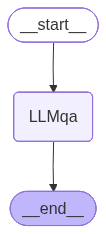

In [35]:
graph.compile()

In [36]:
initial_state = {'question':'what is the distace of the moom from the earth'}

final_state = workflow.invoke(initial_state)

print(final_state['answer'])

The average distance from the **Moon** to the **Earth** is approximately **384,400 kilometers (238,855 miles)**.

However, this distance varies due to the Moon's elliptical orbit:
- **Closest approach (Perigee):** ~363,300 km (225,700 miles)
- **Farthest distance (Apogee):** ~405,500 km (252,000 miles)

This variation is why we sometimes see "supermoons" (when the Moon is closest) and "micromoons" (when it's farthest).

Would you like more details on lunar distances or orbits?
